# Creating Empirical Cumulative Distribution Function

In [56]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [182]:
data = np.array([
        5.9, 6.0, 6.4, 6.4, 6.5, 6.5, 6.6, 6.7, 6.9, 7.0, 7.1, 7.2, 7.5, 7.5, 7.8, 7.9, 8.1, 8.1, 8.2, 8.9, 9.3, 9.3, 
        9.6, 10.4, 10.6, 11.8, 11.8, 12.6, 12.9, 14.3, 15.0, 16.2, 16.3, 17.0, 17.2, 22.8, 23.1, 33.0, 40.0, 42.8,
        43.0, 44.8, 45.0, 45.8
    ])

In [183]:
data

array([  5.9,   6. ,   6.4,   6.4,   6.5,   6.5,   6.6,   6.7,   6.9,
         7. ,   7.1,   7.2,   7.5,   7.5,   7.8,   7.9,   8.1,   8.1,
         8.2,   8.9,   9.3,   9.3,   9.6,  10.4,  10.6,  11.8,  11.8,
        12.6,  12.9,  14.3,  15. ,  16.2,  16.3,  17. ,  17.2,  22.8,
        23.1,  33. ,  40. ,  42.8,  43. ,  44.8,  45. ,  45.8])

In [184]:
len(data)

44

## The ECDF is generated with this function:

$\large{\hat{F}(x) = \frac{\#x_i \leq x}{n}}$

The above basically means for each value of x in your data set consisting of only unique values of x, the function is equal to the number of Xs that are less than or equal to the current X value.

F(5.9) = 1/44 = 0.023<br>
F(6) = 2/44 = 0.045<br>
F(6.4) = 4/44 = 0.091<br>
...<br>
F(45.8) = 44/44 = 1.0

In [160]:
def ecdf(x):
    """Return empirical CDF of x."""

    sx = np.sort(x)
    cdf = (1.0 + np.arange(len(sx)))/len(sx)
    return sx, cdf

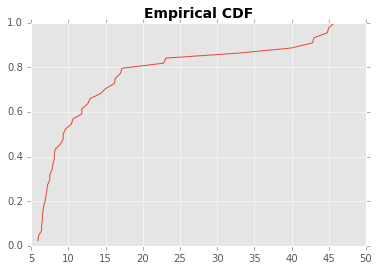

In [161]:
sx, y = ecdf(data)
plt.plot(sx, y)
plt.title("Empirical CDF", fontsize=14, weight='bold')
plt.show()

### Creating 95% confidence band based on [Dvoretzky–Kiefer–Wolfowitz](http://stats.stackexchange.com/questions/55500/confidence-intervals-for-empirical-cdf) inequality:

$\large{ecdf\pm\sqrt{\frac{1}{2n}log(\frac{2}{\alpha})}}$

Confidence band width: 0.204741507042


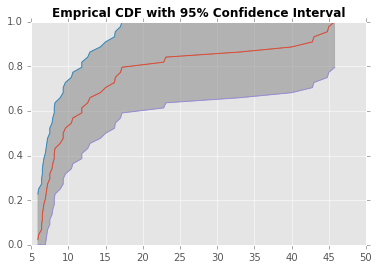

In [129]:
alpha = 0.05
nobs = 44

interval = np.sqrt(np.log(2./alpha) / (2 * nobs))

print("Confidence band width: " + str(interval))

lower = np.clip(y - interval, 0, 1)
upper = np.clip(y + interval, 0, 1)

plt.plot(sx, y, sx, upper, sx, lower)
plt.fill_between(sx, y, upper, color='grey', alpha=0.5)
plt.fill_between(sx, y, lower, color='grey',alpha=0.5)
plt.title("Emprical CDF with 95% Confidence Interval", fontsize=12, weight='bold')
plt.show()

### Found out that the [statsmodels](http://statsmodels.sourceforge.net/devel/_modules/statsmodels/distributions/empirical_distribution.html) package has ECDF function and function for making confidence interval.

In [185]:
from statsmodels.distributions.empirical_distribution import ECDF
import statsmodels.distributions.empirical_distribution as ed

ecdf = ECDF(data)

### Haven't figured it out yet, but not sure why I have -inf value within my x values from my ecdf:

In [187]:
ecdf.x

array([ -inf,   5.9,   6. ,   6.4,   6.4,   6.5,   6.5,   6.6,   6.7,
         6.9,   7. ,   7.1,   7.2,   7.5,   7.5,   7.8,   7.9,   8.1,
         8.1,   8.2,   8.9,   9.3,   9.3,   9.6,  10.4,  10.6,  11.8,
        11.8,  12.6,  12.9,  14.3,  15. ,  16.2,  16.3,  17. ,  17.2,
        22.8,  23.1,  33. ,  40. ,  42.8,  43. ,  44.8,  45. ,  45.8])

In [195]:
len(ecdf.x)

45

### I'll have to remove the -inf value so that I have exactly 44 values, instead of 45

In [188]:
x = ecdf.x [1:]

In [189]:
x

array([  5.9,   6. ,   6.4,   6.4,   6.5,   6.5,   6.6,   6.7,   6.9,
         7. ,   7.1,   7.2,   7.5,   7.5,   7.8,   7.9,   8.1,   8.1,
         8.2,   8.9,   9.3,   9.3,   9.6,  10.4,  10.6,  11.8,  11.8,
        12.6,  12.9,  14.3,  15. ,  16.2,  16.3,  17. ,  17.2,  22.8,
        23.1,  33. ,  40. ,  42.8,  43. ,  44.8,  45. ,  45.8])

In [209]:
len(x)

44

### The y array also has 45 values, instead of 44 values:

In [190]:
ecdf.y

array([ 0.        ,  0.02272727,  0.04545455,  0.06818182,  0.09090909,
        0.11363636,  0.13636364,  0.15909091,  0.18181818,  0.20454545,
        0.22727273,  0.25      ,  0.27272727,  0.29545455,  0.31818182,
        0.34090909,  0.36363636,  0.38636364,  0.40909091,  0.43181818,
        0.45454545,  0.47727273,  0.5       ,  0.52272727,  0.54545455,
        0.56818182,  0.59090909,  0.61363636,  0.63636364,  0.65909091,
        0.68181818,  0.70454545,  0.72727273,  0.75      ,  0.77272727,
        0.79545455,  0.81818182,  0.84090909,  0.86363636,  0.88636364,
        0.90909091,  0.93181818,  0.95454545,  0.97727273,  1.        ])

In [191]:
len(ecdf.y)

45

### So I'll need to remove the zero value:

In [192]:
y = ecdf.y[1:]

In [193]:
y

array([ 0.02272727,  0.04545455,  0.06818182,  0.09090909,  0.11363636,
        0.13636364,  0.15909091,  0.18181818,  0.20454545,  0.22727273,
        0.25      ,  0.27272727,  0.29545455,  0.31818182,  0.34090909,
        0.36363636,  0.38636364,  0.40909091,  0.43181818,  0.45454545,
        0.47727273,  0.5       ,  0.52272727,  0.54545455,  0.56818182,
        0.59090909,  0.61363636,  0.63636364,  0.65909091,  0.68181818,
        0.70454545,  0.72727273,  0.75      ,  0.77272727,  0.79545455,
        0.81818182,  0.84090909,  0.86363636,  0.88636364,  0.90909091,
        0.93181818,  0.95454545,  0.97727273,  1.        ])

### We can create the D-K-W 95% confidence band using the _conf_set() function

In [196]:
lower, upper = ed._conf_set(y, alpha=0.05)

In [205]:
lower

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.02253122,
        0.04525849,  0.06798577,  0.09071304,  0.11344031,  0.13616758,
        0.15889486,  0.18162213,  0.2043494 ,  0.22707667,  0.24980395,
        0.27253122,  0.29525849,  0.31798577,  0.34071304,  0.36344031,
        0.38616758,  0.40889486,  0.43162213,  0.4543494 ,  0.47707667,
        0.49980395,  0.52253122,  0.54525849,  0.56798577,  0.59071304,
        0.61344031,  0.63616758,  0.65889486,  0.68162213,  0.7043494 ,
        0.72707667,  0.74980395,  0.77253122,  0.79525849])

In [206]:
len(lower)

44

In [207]:
upper

array([ 0.22746878,  0.25019605,  0.27292333,  0.2956506 ,  0.31837787,
        0.34110514,  0.36383242,  0.38655969,  0.40928696,  0.43201423,
        0.45474151,  0.47746878,  0.50019605,  0.52292333,  0.5456506 ,
        0.56837787,  0.59110514,  0.61383242,  0.63655969,  0.65928696,
        0.68201423,  0.70474151,  0.72746878,  0.75019605,  0.77292333,
        0.7956506 ,  0.81837787,  0.84110514,  0.86383242,  0.88655969,
        0.90928696,  0.93201423,  0.95474151,  0.97746878,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ])

In [208]:
len(upper)

44

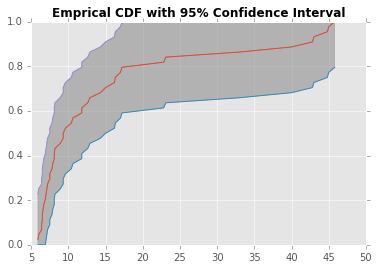

In [194]:
ecdf = ECDF(data)
lower, upper = ed._conf_set(y, alpha=0.05)
plt.plot(x, y, x, lower, x, upper)
plt.fill_between(x, y, upper, color='grey', alpha=0.5)
plt.fill_between(x, y, lower, color='grey',alpha=0.5)
plt.title("Emprical CDF with 95% Confidence Interval", fontsize=12, weight='bold')
plt.show()